In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
import time #helper libraries
from keras.layers import TimeDistributed

C:\Users\Myra\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Myra\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Myra\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
input_file="DIS.csv"

# fix random seed for reproducibility
np.random.seed(5)

# load the dataset
df = read_csv(input_file, header=None, index_col=None, delimiter=',')

# take close price column[5]


In [13]:
df.head(40)

,0,1,2,3,4,5,6
0,1996-12-31,23.011177,23.175543,22.805719,22.928993,17.804647,2719200
1,1997-01-02,22.928993,22.970085,21.942801,22.148258,17.198397,8115400
2,1997-01-03,22.394806,22.805719,22.394806,22.764629,17.677013,4650000
3,1997-01-06,22.764629,22.928993,22.559172,22.682446,17.613201,3623300
4,1997-01-07,22.682446,22.682446,22.435898,22.641354,17.581289,3606200
5,1997-01-08,22.641354,22.805719,22.189348,22.312624,17.353743,3225400
6,1997-01-09,22.312624,22.600264,22.107166,22.189348,17.257866,4606500
7,1997-01-10,22.189348,22.312624,21.819527,22.312624,17.353743,5278700
8,1997-01-13,22.312624,22.518080,22.312624,22.353714,17.385700,4653300
9,1997-01-14,22.353714,22.846811,22.353714,22.764629,17.705294,4760400


In [18]:
all_y = df.iloc[:,1:5].values

In [19]:
all_y.shape

(5035, 4)

In [20]:
all_y[0]

array([23.011177, 23.175543, 22.805719, 22.928993])

In [21]:
dataset=all_y

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [23]:
dataset.shape

(5035, 4)

In [24]:
scaler.inverse_transform(dataset)

array([[ 23.011177,  23.175543,  22.805719,  22.928993],
       [ 22.928993,  22.970085,  21.942801,  22.148258],
       [ 22.394806,  22.805719,  22.394806,  22.764629],
       ...,
       [104.989998, 105.32    , 104.059998, 104.300003],
       [104.230003, 104.769997, 103.870003, 104.559998],
       [104.57    , 105.      , 103.959999, 104.220001]])

In [25]:
# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [26]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [27]:
n_steps_in, n_steps_out = 30, 10

In [28]:
trainX, trainY = split_sequences(train, n_steps_in, n_steps_out)
testX, testY = split_sequences(test, n_steps_in, n_steps_out)

In [29]:
train.shape

(2517, 4)

In [30]:
trainX.shape

(2478, 30, 4)

In [31]:
trainY.shape

(2478, 10, 4)

In [32]:
trainX = np.reshape(trainX, (trainX.shape[0], n_steps_in, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], n_steps_in, testX.shape[2]))

In [33]:
trainX.shape[2]

4

In [36]:
trainX[0]

array([[0.08714119, 0.08569674, 0.08863379, 0.08647767],
       [0.08637945, 0.08379742, 0.08059289, 0.079256  ],
       [0.08142826, 0.08227797, 0.08480479, 0.08495733],
       [0.08485602, 0.08341756, 0.0863364 , 0.08419715],
       [0.08409429, 0.0811384 , 0.0851877 , 0.08381706],
       [0.08371343, 0.08227797, 0.08289028, 0.08077636],
       [0.08066654, 0.08037868, 0.08212449, 0.07963608],
       [0.07952394, 0.07771965, 0.07944419, 0.08077636],
       [0.08066654, 0.07961895, 0.084039  , 0.08115644],
       [0.08104739, 0.08265784, 0.08442189, 0.08495733],
       [0.08485602, 0.08341756, 0.08557061, 0.08457723],
       [0.08447515, 0.08227797, 0.08595349, 0.08381706],
       [0.08371343, 0.08455716, 0.08710219, 0.08723786],
       [0.0879029 , 0.08683632, 0.09131409, 0.08875821],
       [0.08676032, 0.08379742, 0.0882509 , 0.08647767],
       [0.08637945, 0.08683632, 0.0882509 , 0.08951838],
       [0.08942635, 0.08911548, 0.091697  , 0.08837812],
       [0.08828377, 0.08873563,

In [37]:
trainY[0]

array([[0.10275651, 0.10506967, 0.10624721, 0.10738253],
       [0.10732686, 0.11114745, 0.11045911, 0.10966305],
       [0.11037376, 0.11228703, 0.11390523, 0.11194359],
       [0.11151635, 0.10848842, 0.11122493, 0.11004315],
       [0.10923118, 0.10620926, 0.10892753, 0.10586217],
       [0.10580341, 0.10393007, 0.10433272, 0.1016812 ],
       [0.10237567, 0.10279049, 0.10586432, 0.10358165],
       [0.10351825, 0.10279049, 0.10433272, 0.10434182],
       [0.10427997, 0.10506967, 0.10586432, 0.10586217],
       [0.10580341, 0.10355022, 0.10126951, 0.10396175]])

In [38]:
n_features = trainX.shape[2]
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')

In [39]:
model.fit(trainX, trainY, epochs=100, verbose=1)

Epoch 1/100
78/78 [==============================] - 4s 34ms/step - loss: 0.0058
Epoch 2/100
78/78 [==============================] - 3s 34ms/step - loss: 4.1389e-04
Epoch 3/100
78/78 [==============================] - 3s 37ms/step - loss: 2.7330e-04
Epoch 4/100
78/78 [==============================] - 3s 39ms/step - loss: 2.1391e-04
Epoch 5/100
78/78 [==============================] - 3s 34ms/step - loss: 1.9524e-04
Epoch 6/100
78/78 [==============================] - 3s 35ms/step - loss: 1.9311e-04
Epoch 7/100
78/78 [==============================] - 3s 34ms/step - loss: 1.8511e-04
Epoch 8/100
78/78 [==============================] - 3s 37ms/step - loss: 1.8425e-04
Epoch 9/100
78/78 [==============================] - 3s 34ms/step - loss: 1.6673e-04
Epoch 10/100
78/78 [==============================] - 3s 37ms/step - loss: 2.0289e-04
Epoch 11/100
78/78 [==============================] - 3s 37ms/step - loss: 1.7292e-04
Epoch 12/100
78/78 [==============================] - 3s 37ms/step 

78/78 [==============================] - 3s 33ms/step - loss: 1.4759e-04
Epoch 96/100
78/78 [==============================] - 3s 32ms/step - loss: 1.4352e-04
Epoch 97/100
78/78 [==============================] - 3s 32ms/step - loss: 1.4293e-04
Epoch 98/100
78/78 [==============================] - 3s 32ms/step - loss: 1.5087e-04
Epoch 99/100
78/78 [==============================] - 3s 32ms/step - loss: 1.3758e-04
Epoch 100/100
78/78 [==============================] - 3s 34ms/step - loss: 1.3008e-04


In [22]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [23]:
trainX[0]

array([[0.08714119, 0.08569674, 0.08863379, 0.08647767],
       [0.08637945, 0.08379742, 0.08059289, 0.079256  ],
       [0.08142826, 0.08227797, 0.08480479, 0.08495733],
       [0.08485602, 0.08341756, 0.0863364 , 0.08419715],
       [0.08409429, 0.0811384 , 0.0851877 , 0.08381706],
       [0.08371343, 0.08227797, 0.08289028, 0.08077636],
       [0.08066654, 0.08037868, 0.08212449, 0.07963608],
       [0.07952394, 0.07771965, 0.07944419, 0.08077636],
       [0.08066654, 0.07961895, 0.084039  , 0.08115644],
       [0.08104739, 0.08265784, 0.08442189, 0.08495733],
       [0.08485602, 0.08341756, 0.08557061, 0.08457723],
       [0.08447515, 0.08227797, 0.08595349, 0.08381706],
       [0.08371343, 0.08455716, 0.08710219, 0.08723786],
       [0.0879029 , 0.08683632, 0.09131409, 0.08875821],
       [0.08676032, 0.08379742, 0.0882509 , 0.08647767],
       [0.08637945, 0.08683632, 0.0882509 , 0.08951838],
       [0.08942635, 0.08911548, 0.091697  , 0.08837812],
       [0.08828377, 0.08873563,

In [24]:
trainPredict[0]

array([[0.10534973, 0.10366192, 0.10660949, 0.10463987],
       [0.10587072, 0.1041206 , 0.10695134, 0.10498191],
       [0.10615043, 0.10416938, 0.10732223, 0.10542512],
       [0.10662413, 0.10452278, 0.10788545, 0.10596095],
       [0.10704988, 0.10489614, 0.10839403, 0.10642004],
       [0.10737666, 0.10520847, 0.10879488, 0.10678034],
       [0.10761358, 0.10544817, 0.10909456, 0.10705754],
       [0.10778455, 0.10562478, 0.10931386, 0.10727194],
       [0.1079035 , 0.10574822, 0.10946806, 0.10743597],
       [0.10798431, 0.10583116, 0.10957313, 0.10756141]], dtype=float32)

In [25]:
trainPredict=np.array([scaler.inverse_transform(x) for x in trainPredict])

In [26]:
trainY = np.array([scaler.inverse_transform(x) for x in trainY])

In [27]:
testPredict = np.array([scaler.inverse_transform(x) for x in testPredict])

In [28]:
testY = np.array([scaler.inverse_transform(x) for x in testY])

In [29]:
trainPredict.shape

(2478, 10, 4)

In [30]:
trainY[:,:,0]

array([[24.695923, 25.18902 , 25.517752, ..., 24.778107, 24.860289,
        25.024654],
       [25.18902 , 25.517752, 25.641026, ..., 24.860289, 25.024654,
        24.819199],
       [25.517752, 25.641026, 25.394478, ..., 25.024654, 24.819199,
        24.737015],
       ...,
       [33.964497, 34.02367 , 34.339249, ..., 34.132149, 33.648914,
        34.013805],
       [34.02367 , 34.339249, 33.629192, ..., 33.648914, 34.013805,
        34.063118],
       [34.339249, 33.629192, 33.974358, ..., 34.013805, 34.063118,
        33.944775]])

In [31]:
trainY=trainY[:,0,0]

In [32]:
trainPredict=trainPredict[:,0,0]

In [33]:
testPredict=testPredict[:,0,0]

In [34]:
testY=testY[:,0,0]

In [35]:
trainPredict.shape

(2478,)

In [36]:
new_train=train[:,0].copy()
new_train[n_steps_in+1:]=np.nan
new_train[n_steps_in:len(trainPredict)+n_steps_in]=trainPredict

In [37]:
new_train.shape

(2517,)

In [38]:
train.shape

(2517, 4)

In [39]:
new_test=test[:,0].copy()
new_test[n_steps_in+1:]=np.nan
new_test[n_steps_in:len(testPredict)+n_steps_in]=testPredict

In [40]:
df.loc[:train_size-1,"Pred-0"]=new_train

In [41]:
df.loc[train_size:,"Pred-0"]=new_test

In [42]:
df[0]=pd.to_datetime(df[0])

C:\Users\Myra\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Myra\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Myra\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


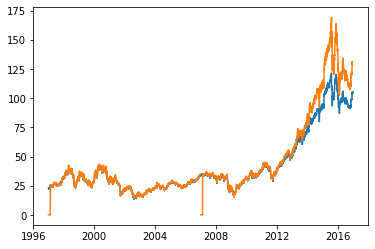

In [43]:
plt.plot(df[0], df[1])
plt.plot(df[0], df["Pred-0"])

In [44]:
new_train[n_steps_in+1:].shape

(2486,)

In [45]:
new_train[:-n_steps_in]

array([ 0.08714119,  0.08637945,  0.08142826, ..., 32.23615646,
       32.27325439, 32.51946259])

In [46]:
difference_array = np.subtract(trainY, trainPredict)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print('Train Score: %.2f RMSE' % (mse))

difference_array = np.subtract(testY, testPredict)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print('Test Score: %.2f RMSE' % (mse))

Train Score: 0.24 RMSE
Test Score: 176.21 RMSE
